## Importiieren der Daten


In [4]:

# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print()
print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (7497, 20)
Loaded Validation features dimensions: (1874, 20)

Loaded Training labels dimensions: (7497, 1)
Loaded Validation labels dimensions: (1874, 1)

First few rows of loaded training features:
   Warengruppe_2  Warengruppe_3  Warengruppe_4  Warengruppe_5  Warengruppe_6  \
0              0              0              0              0              0   
1              0              0              1              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              0              0              0              0   

   Temperatur_Kategorie_2  Temperatur_Kategorie_3  Jahreszeit_FSHW_2  \
0                       0                       0                  0   
1                       1                       0                  1   
2                       1                       0                  

In [5]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          1.          0.
   0.          0.          0.          0.          0.          0.
  -0.88972099  0.        ]
 [ 0.          0.          1.          0.          0.          1.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
  -0.80026969  0.        ]
 [ 0.          1.          0.          0.          0.          1.
   0.          1.          0.          0.          1.          0.
   0.          0.          0.          1.          0.          0.
  -0.35301318  0.        ]
 [ 0.          0.          1.          0.          0.          1.
   0.          0.          1.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
  -0.75554404  0.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.    

## Aufstellen der Neuronalen Netzes



In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(20, activation='relu'),
  Dropout(0.2),  
  Dense(10, activation='relu'),
  Dropout(0.1),  
  Dense(1)
])

model.summary()



2024-06-27 12:06:41.194270: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 12:06:41.200007: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 12:06:41.290400: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 12:06:50.657006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 681 (2.66 KB)

 Non-trainable params: 40 (160.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [7]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=12,
                    validation_data=(validation_features, validation_labels))

Epoch 1/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 61759.7812 - val_loss: 36804.9688
Epoch 2/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22834.2637 - val_loss: 7869.2007
Epoch 3/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9970.3018 - val_loss: 5835.6743
Epoch 4/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8324.8203 - val_loss: 5076.1895
Epoch 5/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8416.8105 - val_loss: 4623.6860
Epoch 6/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8047.9604 - val_loss: 4390.0947
Epoch 7/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8301.0674 - val_loss: 4341.2803
Epoch 8/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8476.0361 - val_loss: 4127.8452
Epoch 9/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8755.1592 - val_loss: 4018.6733
Epoch 10/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7913.8110 - val_loss: 3977.4912
Epoch 11/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6748.1255 - val

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [8]:
model.save("python_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

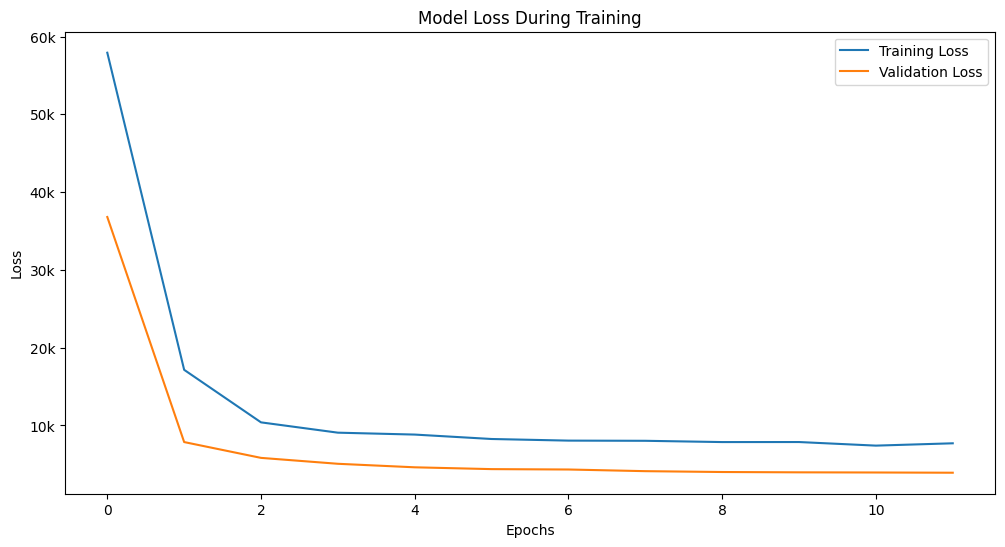

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    return '%1.0fk' % (x * 1e-3)

formatter = FuncFormatter(thousands)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


## Making Predictions and Evaluating the Model



235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
MAPE on the Training Data: 25.87%
MAPE on the Validation Data: 26.54%

MAPE on the Training Data ('Warengruppe_1 = 1): 28.24%
MAPE on the Validation Data ('Warengruppe_1 = 1): 29.13%
MAPE on the Training Data ('Warengruppe_2 = 1): 17.82%
MAPE on the Validation Data ('Warengruppe_2 = 1): 17.76%
MAPE on the Training Data ('Warengruppe_3 = 1): 20.82%
MAPE on the Validation Data ('Warengruppe_3 = 1): 22.05%
MAPE on the Training Data ('Warengruppe_4 = 1): 27.23%
MAPE on the Validation Data ('Warengruppe_4 = 1): 28.97%
MAPE on the Training Data ('Warengruppe_5 = 1): 16.00%
MAPE on the Validation Data ('Warengruppe_5 = 1): 15.87%
MAPE on the Training Data ('Warengruppe_6 = 1): 51.67%
MAPE on the Validation Data ('Warengruppe_6 = 1): 55.30%
[28.238507813261336, 17.82440839176322, 20.816694585876252, 27.234434988249983, 16.002901379753233, 51.6719669946337]
[29.126988196289666, 17.757046072777673, 22.04802850376

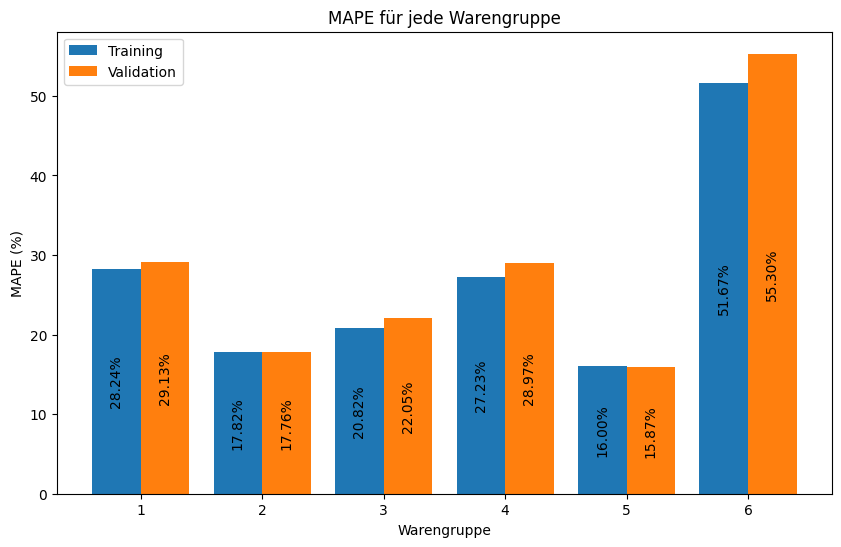

In [10]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")
print('')


mape_training = []
mape_validation = []

training_mask = (training_features['Warengruppe_2'] == 0) & (training_features['Warengruppe_3'] == 0) & (training_features['Warengruppe_4'] == 0) & (training_features['Warengruppe_5']) == 0 & (training_features['Warengruppe_6'] == 0)
validation_mask =(validation_features['Warengruppe_2'] == 0) & (validation_features['Warengruppe_3'] == 0) & (validation_features['Warengruppe_4'] == 0) & (validation_features['Warengruppe_5']) == 0 & (validation_features['Warengruppe_6'] == 0)
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_1 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_1 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_2'] == 1
validation_mask = validation_features['Warengruppe_2'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_2 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_2 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_3'] == 1
validation_mask = validation_features['Warengruppe_3'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_3 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_3 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_4'] == 1
validation_mask = validation_features['Warengruppe_4'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_4 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_4 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_5'] == 1
validation_mask = validation_features['Warengruppe_5'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_5 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_5 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

training_mask = training_features['Warengruppe_6'] == 1
validation_mask = validation_features['Warengruppe_6'] == 1
filtered_training_labels = training_labels[training_mask]
filtered_training_predictions = training_predictions[training_mask]
filtered_validation_labels = validation_labels[validation_mask]
filtered_validation_predictions = validation_predictions[validation_mask]
print(f"MAPE on the Training Data ('Warengruppe_6 = 1): {mape(filtered_training_labels, filtered_training_predictions):.2f}%")
print(f"MAPE on the Validation Data ('Warengruppe_6 = 1): {mape(filtered_validation_labels, filtered_validation_predictions):.2f}%")
mape_training.append(mape(filtered_training_labels, filtered_training_predictions))
mape_validation.append(mape(filtered_validation_labels, filtered_validation_predictions))

print(mape_training)
print(mape_validation)


plt.figure(figsize=(10, 6))
bar_width = 0.4
warengruppen = np.arange(1, 7)

# Bars for Training
training_bars = plt.bar(warengruppen - bar_width/2, mape_training, width=bar_width, label='Training', align='center')

# Bars for Validation
validation_bars = plt.bar(warengruppen + bar_width/2, mape_validation, width=bar_width, label='Validation', align='center')

plt.xlabel('Warengruppe')
plt.ylabel('MAPE (%)')
plt.title('MAPE für jede Warengruppe')
plt.xticks(warengruppen)
plt.legend()

# Turn the numbers
for bars in [training_bars, validation_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2, f'{height:.2f}%', ha='center', va='center', rotation=90)

plt.show()


## Export Predictions

In [11]:
# Import Data from DataPreparation

kaggledata = pd.read_csv('kaggle_sample_nn_final.csv')

kaggledata_features = ['Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 'Temperatur_Kategorie_2', 'Temperatur_Kategorie_3', 'Jahreszeit_FSHW_2', 'Jahreszeit_FSHW_3', 'Jahreszeit_FSHW_4', 'Wochentag_MDMDFSS_2', 'Wochentag_MDMDFSS_3', 'Wochentag_MDMDFSS_4', 'Wochentag_MDMDFSS_5', 'Wochentag_MDMDFSS_6', 'FerienSH', 'Feiertag', 'Saison_Warengruppe', 'Verbraucherpreisindex_N', 'Schnee']
vorhersage_daten = kaggledata[kaggledata_features]
vorhersagen = model.predict(vorhersage_daten)
kaggledata = kaggledata.assign(Umsatz=vorhersagen)

# Use only 'id' and 'Umsatz' for export
export_daten = kaggledata[['id', 'Umsatz']]

# Export the dataframe to a csv file
export_daten.to_csv('kaggle_predictions_nn_final.csv', index=False)




58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
